# Calculate PPA performance
## Maria Jacob
In this notebook we want to
* explore the various datasets provided

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring data sets

## Wind forecast

In [34]:
wind_forecast = pd.read_csv("2018_2022_national_wind_forecast_data.csv")
wind_forecast

,delivery_from,forecast_timestamp,day_ahead_national_forecast,national_wind_capacity
0,2018-04-16 23:00:00+00:00,2018-04-19 08:05:35+00:00,7523.656150,11173.25
1,2018-04-16 23:30:00+00:00,2018-04-19 08:05:35+00:00,7656.137150,11173.25
2,2018-04-17 00:00:00+00:00,2018-04-19 08:05:35+00:00,7736.733183,11173.25
3,2018-04-17 00:30:00+00:00,2018-04-19 08:05:35+00:00,7765.444248,11173.25
4,2018-04-17 01:00:00+00:00,2018-04-19 08:05:35+00:00,7852.161290,11173.25
...,...,...,...,...
74581,2022-07-19 20:30:00+00:00,2022-07-18 07:22:37+00:00,5951.000000,15635.00
74582,2022-07-19 21:00:00+00:00,2022-07-18 07:22:37+00:00,5806.000000,15635.00
74583,2022-07-19 21:30:00+00:00,2022-07-18 07:22:37+00:00,5644.000000,15635.00
74584,2022-07-19 22:00:00+00:00,2022-07-18 07:22:37+00:00,5458.000000,15635.00


In [35]:
(wind_forecast["delivery_from"] < wind_forecast["forecast_timestamp"]).sum()

163

In [36]:
(wind_forecast["delivery_from"] >= wind_forecast["forecast_timestamp"]).sum()

74423

In [37]:
wind_forecast["forecast_timestamp"].unique()

array(['2018-04-19 08:05:35+00:00', '2018-04-19 08:05:14+00:00',
       '2018-04-19 08:04:59+00:00', ..., '2022-07-16 07:22:58+00:00',
       '2022-07-17 07:22:50+00:00', '2022-07-18 07:22:37+00:00'],
      dtype=object)

In [38]:
wind_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74586 entries, 0 to 74585
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   delivery_from                74586 non-null  object 
 1   forecast_timestamp           74586 non-null  object 
 2   day_ahead_national_forecast  74586 non-null  float64
 3   national_wind_capacity       74586 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


are the columns appropriately named? Looks like delivery from is before forecast timestamp (which looks like it is the time when the forecast was made)

In [39]:
wind_forecast["delivery_from"] = pd.to_datetime(wind_forecast["delivery_from"])

In [40]:
wind_forecast["forecast_timestamp"] = pd.to_datetime(wind_forecast["forecast_timestamp"])

In [41]:
wind_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74586 entries, 0 to 74585
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   delivery_from                74586 non-null  datetime64[ns, UTC]
 1   forecast_timestamp           74586 non-null  datetime64[ns, UTC]
 2   day_ahead_national_forecast  74586 non-null  float64            
 3   national_wind_capacity       74586 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(2)
memory usage: 2.3 MB


### check data quality

There seemed to be some rows (163) where `delivery_from` was before the `forecast_timestamp` which can't be right. I'll remove them since there are so few but something to check

In [42]:
wind_forecast = wind_forecast.loc[wind_forecast["delivery_from"]>=wind_forecast["forecast_timestamp"]].copy()

In [52]:
print(
    "Earliest delivery forecast: ",wind_forecast["delivery_from"].dt.date.min(),
    "\nLatest delivery forecast: ",wind_forecast["delivery_from"].dt.date.max(),
    "\nNumber of days: ",wind_forecast["delivery_from"].dt.date.nunique(),
    f"\nSo there are {int(wind_forecast["delivery_from"].dt.date.nunique()/365)}+ years of forecasts"
)

Earliest delivery forecast:  2018-04-19 
Latest delivery forecast:  2022-07-19 
Number of days:  1551 
So there are 4+ years of forecasts


In [23]:
wind_forecast.isna().sum()

delivery_from                  0
forecast_timestamp             0
day_ahead_national_forecast    0
national_wind_capacity         0
dtype: int64

Check for any extreme values (since none missing)

In [9]:
wind_forecast.describe()

,day_ahead_national_forecast,national_wind_capacity
count,74586.000000,74586.000000
mean,5247.963081,14321.663905
std,3501.113808,1575.244552
min,202.000000,1136.000000
25%,2250.000000,13347.000000
50%,4557.000000,15181.000000
75%,7805.000000,15594.000000
max,14138.000000,15730.000000


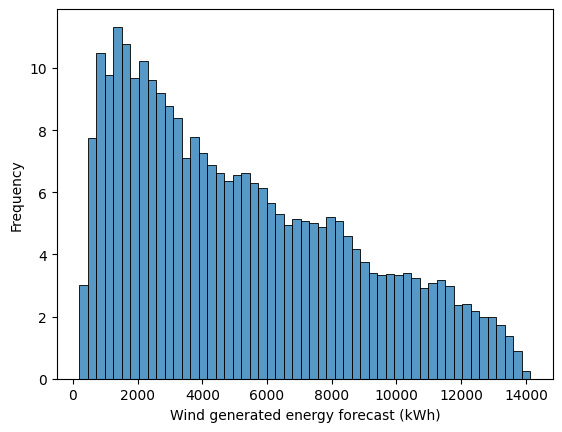

In [29]:
sns.histplot(
    data=wind_forecast,
    x="day_ahead_national_forecast",
    stat="frequency",
)
plt.xlabel("Wind generated energy forecast (kWh)")
plt.show()

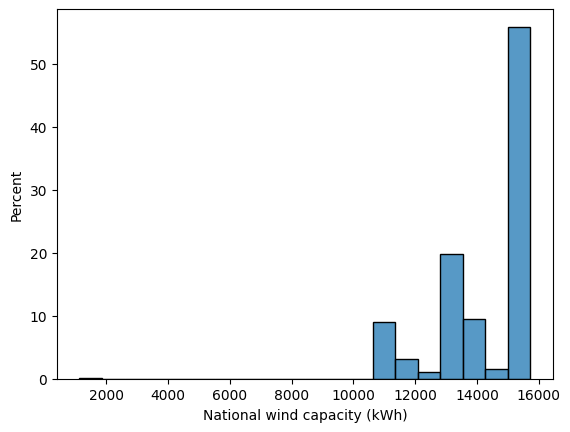

In [31]:
sns.histplot(
    data=wind_forecast,
    x="national_wind_capacity",
    stat="percent",
    bins=20,
)
plt.xlabel("National wind capacity (kWh)")
plt.show()

capacity and generation are quite differently skewed

## wind generated

In [12]:
wind_generated = pd.read_csv("2018_2022_national_wind_generated_data.csv")
wind_generated.head()

,delivery_from,english_wind_generated,scottish_wind_generated,total_wind_generated
0,2018-03-31 23:00:00+00:00,1680.060,614.578,2294.638
1,2018-03-31 23:30:00+00:00,1625.204,560.996,2186.200
2,2018-04-01 00:00:00+00:00,1446.452,514.734,1961.186
3,2018-04-01 00:30:00+00:00,1273.264,466.560,1739.824
4,2018-04-01 01:00:00+00:00,1387.798,387.370,1775.168


In [56]:
wind_generated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73008 entries, 0 to 73007
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delivery_from            73008 non-null  object 
 1   english_wind_generated   73008 non-null  float64
 2   scottish_wind_generated  73008 non-null  float64
 3   total_wind_generated     73008 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.2+ MB


In [57]:
wind_generated["delivery_from"] = pd.to_datetime(wind_generated["delivery_from"])

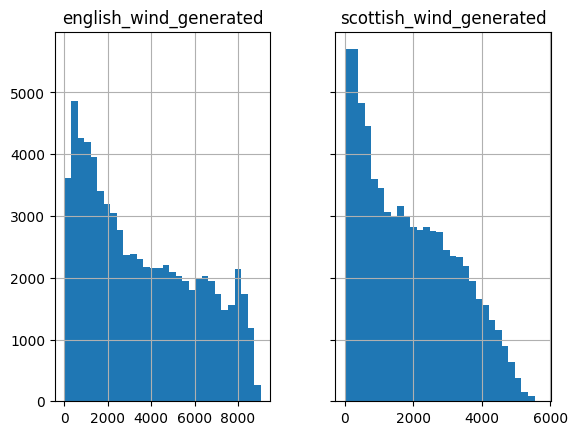

In [64]:
wind_generated[["english_wind_generated","scottish_wind_generated"]].hist(bins=30,sharey=True)
plt.show()

# Spot prices

In [15]:
spot_prices = pd.read_csv("2018_2022_spot_price_data.csv")
spot_prices.head()

,delivery_from,day_ahead_half_hourly_auction_price,imbalance_price
0,2018-01-01 00:00:00+00:00,46.73,55.94
1,2018-01-01 00:30:00+00:00,50.11,55.94
2,2018-01-01 01:00:00+00:00,56.60,62.94
3,2018-01-01 01:30:00+00:00,51.83,31.00
4,2018-01-01 02:00:00+00:00,46.23,60.81
